In [23]:
import pandas as pd

In [24]:
drinks = pd.read_csv("hotaling_cocktails - Cocktails.csv")

In [25]:
drinks.head()

Cocktail Name          Bartender      Bar/Company  \
0             Flor de Amaras     Kelly McCarthy              NaN   
1            The Happy Place  Elizabeth Montana  Forgery & Verso   
2     Bon Voyage Pisco Punch        Jon Morales              NaN   
3  Still Life of a Pineapple    Daniel Braganca          Backbar   
4        The Bittered Valley         Nik Virrey              NaN   

        Location                                        Ingredients  \
0         Boston  1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1  San Francisco  2 oz Junipero Gin, .75 oz House-made Cranberry...   
2  San Francisco  1500 ml BarSol Selecto Italia Pisco, 750 ml Le...   
3     Somerville  1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...   
4        Seattle  1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...   

                                     Garnish   Glassware  \
0                            Marigold Petals         NaN   
1  Dehydrated Lemon Wheel, Sprig of Rosemary         NaN   
2                                        NaN  Punch Bowl   
3                                        NaN         NaN   
4                                        NaN         NaN   

                                         Preparation  \
0  *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...   
1  *House-made Cranberry syrup: \n-- 2 cups Fresh...   
2  *Pineapple Gomme: \nMix equal parts (1.5 cups)...   
3  *Pineapple Syrup:\n<em>Equal parts pineapple b...   
4  1st glass ingredients:\nLuxardo Maraschino, Ac...   

                                              Notes  
0                                               NaN  
1  Junipero Gin 20th Anniversary Signature Cocktail  
2                                               NaN  
3                                               NaN  
4                                               NaN

In [26]:
# drop Bartender, Garnish, Glassware, and Notes columns
drink = drinks.drop(["Bartender", "Garnish", "Glassware", "Notes"], axis=1)

In [27]:
drink.head()

Cocktail Name      Bar/Company       Location  \
0             Flor de Amaras              NaN         Boston   
1            The Happy Place  Forgery & Verso  San Francisco   
2     Bon Voyage Pisco Punch              NaN  San Francisco   
3  Still Life of a Pineapple          Backbar     Somerville   
4        The Bittered Valley              NaN        Seattle   

                                         Ingredients  \
0  1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1  2 oz Junipero Gin, .75 oz House-made Cranberry...   
2  1500 ml BarSol Selecto Italia Pisco, 750 ml Le...   
3  1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...   
4  1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...   

                                         Preparation  
0  *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...  
1  *House-made Cranberry syrup: \n-- 2 cups Fresh...  
2  *Pineapple Gomme: \nMix equal parts (1.5 cups)...  
3  *Pineapple Syrup:\n<em>Equal parts pineapple b...  
4  1st glass ingredients:\nLuxardo Maraschino, Ac...

In [28]:
drink["Ingredients"][0]

'1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5 oz Lime Juice,  top Soda Water'

In [29]:
import re
def parse_ingredients(ingredient_str):
    # Remove numbers
    no_numbers = re.sub(r"\d+\.?\d*", "", ingredient_str)
    # Remove units
    no_units = re.sub(
        r"oz|ml|dash|dashes|splash|splashes|pinch|pinches|cup|cups| ", "", no_numbers
    )
    clean_str = re.sub(r'\*|\.', '', no_units)
    # Split by commas
    ingredients = clean_str.split(',')
    # Remove leading/trailing white space from each ingredient
    ingredients = [ingredient.strip() for ingredient in ingredients]
    return ingredients

In [30]:
drink['materials'] = drink['Ingredients'].apply(parse_ingredients)

In [31]:
drink.head()

Cocktail Name      Bar/Company       Location  \
0             Flor de Amaras              NaN         Boston   
1            The Happy Place  Forgery & Verso  San Francisco   
2     Bon Voyage Pisco Punch              NaN  San Francisco   
3  Still Life of a Pineapple          Backbar     Somerville   
4        The Bittered Valley              NaN        Seattle   

                                         Ingredients  \
0  1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1  2 oz Junipero Gin, .75 oz House-made Cranberry...   
2  1500 ml BarSol Selecto Italia Pisco, 750 ml Le...   
3  1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...   
4  1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...   

                                         Preparation  \
0  *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...   
1  *House-made Cranberry syrup: \n-- 2 cups Fresh...   
2  *Pineapple Gomme: \nMix equal parts (1.5 cups)...   
3  *Pineapple Syrup:\n<em>Equal parts pineapple b...   
4  1st glass ingredients:\nLuxardo Maraschino, Ac...   

                                           materials  
0  [Mezcal, HibiscusSimpleSyrup, LimeJuice, topSo...  
1  [JuniperoGin, House-madeCranberrySyrup, LemonJ...  
2  [BarSolSelectoItaliaPisco, LemonJuice, Pineapp...  
3  [BarSolPrimeroQuebrantaPisco, DryVermouth, StG...  
4  [LuxardoMaraschinoLiqueur, dropsAcidphosphate,...

## BERT Embedding

In [32]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Set the model in evaluation mode to deactivate the DropOut modules
model.eval()

def embed_text(text):
    # Add the special tokens.
    marked_text = "[CLS] " + text + " [SEP]"

    # Split the sentence into tokens.
    tokenized_text = tokenizer.tokenize(marked_text)

    # Map the token strings to their vocabulary indeces.
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])

    # Predict hidden states features for each layer
    with torch.no_grad():
        outputs = model(tokens_tensor)

    # Get the embeddings
    embeddings = outputs.last_hidden_state

    # Calculate the mean for the sentence embeddings
    sentence_embedding = torch.mean(embeddings, dim=1)

    return sentence_embedding.numpy()


In [33]:

# Apply the function to the 'Ingredients' column
# Join the list of ingredients into a single string
drink['materials_str'] = drink['materials'].apply(' '.join)
drink['vector'] = drink['materials_str'].apply(embed_text)

In [34]:
drink.head()

Cocktail Name      Bar/Company       Location  \
0             Flor de Amaras              NaN         Boston   
1            The Happy Place  Forgery & Verso  San Francisco   
2     Bon Voyage Pisco Punch              NaN  San Francisco   
3  Still Life of a Pineapple          Backbar     Somerville   
4        The Bittered Valley              NaN        Seattle   

                                         Ingredients  \
0  1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1  2 oz Junipero Gin, .75 oz House-made Cranberry...   
2  1500 ml BarSol Selecto Italia Pisco, 750 ml Le...   
3  1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...   
4  1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...   

                                         Preparation  \
0  *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...   
1  *House-made Cranberry syrup: \n-- 2 cups Fresh...   
2  *Pineapple Gomme: \nMix equal parts (1.5 cups)...   
3  *Pineapple Syrup:\n<em>Equal parts pineapple b...   
4  1st glass ingredients:\nLuxardo Maraschino, Ac...   

                                           materials  \
0  [Mezcal, HibiscusSimpleSyrup, LimeJuice, topSo...   
1  [JuniperoGin, House-madeCranberrySyrup, LemonJ...   
2  [BarSolSelectoItaliaPisco, LemonJuice, Pineapp...   
3  [BarSolPrimeroQuebrantaPisco, DryVermouth, StG...   
4  [LuxardoMaraschinoLiqueur, dropsAcidphosphate,...   

                                       materials_str  \
0  Mezcal HibiscusSimpleSyrup LimeJuice topSodaWater   
1  JuniperoGin House-madeCranberrySyrup LemonJuic...   
2  BarSolSelectoItaliaPisco LemonJuice PineappleG...   
3  BarSolPrimeroQuebrantaPisco DryVermouth StGerm...   
4  LuxardoMaraschinoLiqueur dropsAcidphosphate Ba...   

                                              vector  
0  [[-0.13143826, -0.09915891, 0.32269174, 0.4231...  
1  [[-0.12407648, 0.04294693, 0.5966528, -0.10363...  
2  [[0.08518948, -0.052519877, 0.53686804, 0.3018...  
3  [[-0.16768777, -0.004077124, 0.4640057, 0.2496...  
4  [[-0.050918404, 0.10019419, 0.42198563, 0.1993...

In [35]:
drink

Cocktail Name           Bar/Company       Location  \
0               Flor de Amaras                   NaN         Boston   
1              The Happy Place       Forgery & Verso  San Francisco   
2       Bon Voyage Pisco Punch                   NaN  San Francisco   
3    Still Life of a Pineapple               Backbar     Somerville   
4          The Bittered Valley                   NaN        Seattle   
..                         ...                   ...            ...   
682         The Negroni Bianco                   NaN            NaN   
683           Match Grip Julep           Death & Co.       New York   
684             The Dry Cruise  Rob Roy, The Hideout        Seattle   
685                   Red Hook         Henrietta Red      Nashville   
686                 Union Jack      Union Lodge No.1         Denver   

                                           Ingredients  \
0    1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...   
1    2 oz Junipero Gin, .75 oz House-made Cranberry...   
2    1500 ml BarSol Selecto Italia Pisco, 750 ml Le...   
3    1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...   
4    1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...   
..                                                 ...   
682  1.5 oz Luxardo Bitter Bianco, .75 oz Tempus Fu...   
683  1.5 oz H by HINE, .5 oz Jamaican Rum, 1 tsp Ca...   
684  1 oz Luxardo Bitter Bianco, 1 oz Lustau Oloros...   
685  2 oz Rye Whiskey, 5 oz Punt e Mes, .5 oz Luxar...   
686  .75 oz Luxardo Maraschino Liqueur, .75 oz Gree...   

                                           Preparation  \
0    *Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...   
1    *House-made Cranberry syrup: \n-- 2 cups Fresh...   
2    *Pineapple Gomme: \nMix equal parts (1.5 cups)...   
3    *Pineapple Syrup:\n<em>Equal parts pineapple b...   
4    1st glass ingredients:\nLuxardo Maraschino, Ac...   
..                                                 ...   
682                                                NaN   
683                                                NaN   
684                                                NaN   
685                                                NaN   
686                                                NaN   

                                             materials  \
0    [Mezcal, HibiscusSimpleSyrup, LimeJuice, topSo...   
1    [JuniperoGin, House-madeCranberrySyrup, LemonJ...   
2    [BarSolSelectoItaliaPisco, LemonJuice, Pineapp...   
3    [BarSolPrimeroQuebrantaPisco, DryVermouth, StG...   
4    [LuxardoMaraschinoLiqueur, dropsAcidphosphate,...   
..                                                 ...   
682  [LuxardoBitterBianco, TempusFugitAlessioVermou...   
683  [HbyHINE, JamaicanRum, tspCacao, tspBrancaMent...   
684  [LuxardoBitterBianco, LustauOlorosoSherry, StG...   
685   [RyeWhiskey, PunteMes, LuxardoMaraschinoLiqueur]   
686  [LuxardoMaraschinoLiqueur, GreenChartreuse, Gr...   

                                         materials_str  \
0    Mezcal HibiscusSimpleSyrup LimeJuice topSodaWater   
1    JuniperoGin House-madeCranberrySyrup LemonJuic...   
2    BarSolSelectoItaliaPisco LemonJuice PineappleG...   
3    BarSolPrimeroQuebrantaPisco DryVermouth StGerm...   
4    LuxardoMaraschinoLiqueur dropsAcidphosphate Ba...   
..                                                 ...   
682  LuxardoBitterBianco TempusFugitAlessioVermouth...   
683  HbyHINE JamaicanRum tspCacao tspBrancaMenta ts...   
684  LuxardoBitterBianco LustauOlorosoSherry StGerm...   
685       RyeWhiskey PunteMes LuxardoMaraschinoLiqueur   
686  LuxardoMaraschinoLiqueur GreenChartreuse Grena...   

                                                vector  
0    [[-0.13143826, -0.09915891, 0.32269174, 0.4231...  
1    [[-0.12407648, 0.04294693, 0.5966528, -0.10363...  
2    [[0.08518948, -0.052519877, 0.53686804, 0.3018...  
3    [[-0.16768777, -0.004077124, 0.4640057, 0.2496...  
4    [[-0.050918404, 0.10019419, 0.42198563, 0.1993...  
..                                

In [36]:
drink["vector"][0].shape

(1, 768)

## Clean columns

In [37]:
#drop Ingredients Preparation materials materisls_str columns
payload = drink.drop(["Ingredients", "Preparation", "materials_str"], axis=1)
payload

Cocktail Name           Bar/Company       Location  \
0               Flor de Amaras                   NaN         Boston   
1              The Happy Place       Forgery & Verso  San Francisco   
2       Bon Voyage Pisco Punch                   NaN  San Francisco   
3    Still Life of a Pineapple               Backbar     Somerville   
4          The Bittered Valley                   NaN        Seattle   
..                         ...                   ...            ...   
682         The Negroni Bianco                   NaN            NaN   
683           Match Grip Julep           Death & Co.       New York   
684             The Dry Cruise  Rob Roy, The Hideout        Seattle   
685                   Red Hook         Henrietta Red      Nashville   
686                 Union Jack      Union Lodge No.1         Denver   

                                             materials  \
0    [Mezcal, HibiscusSimpleSyrup, LimeJuice, topSo...   
1    [JuniperoGin, House-madeCranberrySyrup, LemonJ...   
2    [BarSolSelectoItaliaPisco, LemonJuice, Pineapp...   
3    [BarSolPrimeroQuebrantaPisco, DryVermouth, StG...   
4    [LuxardoMaraschinoLiqueur, dropsAcidphosphate,...   
..                                                 ...   
682  [LuxardoBitterBianco, TempusFugitAlessioVermou...   
683  [HbyHINE, JamaicanRum, tspCacao, tspBrancaMent...   
684  [LuxardoBitterBianco, LustauOlorosoSherry, StG...   
685   [RyeWhiskey, PunteMes, LuxardoMaraschinoLiqueur]   
686  [LuxardoMaraschinoLiqueur, GreenChartreuse, Gr...   

                                                vector  
0    [[-0.13143826, -0.09915891, 0.32269174, 0.4231...  
1    [[-0.12407648, 0.04294693, 0.5966528, -0.10363...  
2    [[0.08518948, -0.052519877, 0.53686804, 0.3018...  
3    [[-0.16768777, -0.004077124, 0.4640057, 0.2496...  
4    [[-0.050918404, 0.10019419, 0.42198563, 0.1993...  
..                                                 ...  
682  [[-0.23075008, -0.23583703, 0.47340533, 0.2662...  
683  [[0.095591724, 0.0460648, 0.114091255, 0.01936...  
684  [[-0.1859317, -0.04415231, 0.45557404, 0.36507...  
685  [[-0.0628253, 0.11565677, 0.09627766, 0.147350...  
686  [[-0.20367013, 0.12922227, 0.1845177, -0.06618...  

[687 rows x 5 columns]

In [38]:
#rename Bar/Company to Bar
payload = payload.rename(columns={"Bar/Company": "Bar"})

In [66]:
payload

Cocktail Name                   Bar       Location  \
0               Flor de Amaras               unknown         Boston   
1              The Happy Place       Forgery & Verso  San Francisco   
2       Bon Voyage Pisco Punch               unknown  San Francisco   
3    Still Life of a Pineapple               Backbar     Somerville   
4          The Bittered Valley               unknown        Seattle   
..                         ...                   ...            ...   
682         The Negroni Bianco               unknown        unknown   
683           Match Grip Julep           Death & Co.       New York   
684             The Dry Cruise  Rob Roy, The Hideout        Seattle   
685                   Red Hook         Henrietta Red      Nashville   
686                 Union Jack      Union Lodge No.1         Denver   

                                             materials  \
0    [Mezcal, HibiscusSimpleSyrup, LimeJuice, topSo...   
1    [JuniperoGin, House-madeCranberrySyrup, LemonJ...   
2    [BarSolSelectoItaliaPisco, LemonJuice, Pineapp...   
3    [BarSolPrimeroQuebrantaPisco, DryVermouth, StG...   
4    [LuxardoMaraschinoLiqueur, dropsAcidphosphate,...   
..                                                 ...   
682  [LuxardoBitterBianco, TempusFugitAlessioVermou...   
683  [HbyHINE, JamaicanRum, tspCacao, tspBrancaMent...   
684  [LuxardoBitterBianco, LustauOlorosoSherry, StG...   
685   [RyeWhiskey, PunteMes, LuxardoMaraschinoLiqueur]   
686  [LuxardoMaraschinoLiqueur, GreenChartreuse, Gr...   

                                                vector  
0    [[-0.13143826, -0.09915891, 0.32269174, 0.4231...  
1    [[-0.12407648, 0.04294693, 0.5966528, -0.10363...  
2    [[0.08518948, -0.052519877, 0.53686804, 0.3018...  
3    [[-0.16768777, -0.004077124, 0.4640057, 0.2496...  
4    [[-0.050918404, 0.10019419, 0.42198563, 0.1993...  
..                                                 ...  
682  [[-0.23075008, -0.23583703, 0.47340533, 0.2662...  
683  [[0.095591724, 0.0460648, 0.114091255, 0.01936...  
684  [[-0.1859317, -0.04415231, 0.45557404, 0.36507...  
685  [[-0.0628253, 0.11565677, 0.09627766, 0.147350...  
686  [[-0.20367013, 0.12922227, 0.1845177, -0.06618...  

[687 rows x 5 columns]

In [57]:
# replace Nan values in Bar, Location with unknown
payload['Cocktail Name'] = payload['Cocktail Name'].fillna('unknown')
payload['Bar'] = payload['Bar'].fillna('unknown')
payload['Location'] = payload['Location'].fillna('unknown')
payload['materials'] = payload['materials'].fillna('unknown')


## JSON Payload formatting

In [62]:
import pandas as pd
import json
import numpy as np

# Assuming you already have a DataFrame named df containing your cocktail data

# Example DataFrame creation:
# df = pd.DataFrame({
#     'Cocktail Name': ['Flor de Amaras', 'Another Cocktail'],
#     'Bar': ['Bar1', 'Bar2'],
#     'Location': ['Boston', 'New York'],
#     'vector': [np.array([-0.131, -0.099, 0.322, 0.423, 0.222, 0.120, 0.117, 0.628, -0.096, -0.207, 0.091, -0.170, -0.028, 0.256]), 
#                np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4])]
# })

# Transform DataFrame to the desired dictionary format
transformed_data = []
for _, row in payload.iterrows():
    cocktail_name = row['Cocktail Name'].encode('ascii', 'ignore').decode()
    flat_vec = row['vector'].flatten()
    vector = flat_vec.tolist()  # Convert NumPy array to list
    bar = row['Bar']
    location = row['Location']
    ingredients = row['materials']

    transformed_entry = {
        "id": cocktail_name,
        "values": vector,
        "metadata": {
            "Bar": bar,
            "Location": location,
            "ingredients": ingredients
        }
    }
    transformed_data.append(transformed_entry)

# Write the transformed data to a new JSON file
with open('transformed_cocktail_data.json', 'w') as file:
    json.dump(transformed_data, file, indent=4)


In [63]:
from dotenv import load_dotenv
load_dotenv()

True

## Pinecone Upload

In [64]:
import json
import os
from pinecone import Pinecone

pinecone_api_key = os.environ.get("PINECONE_KEY")
print(pinecone_api_key)


d3267870-4f6d-4644-b9c6-ae3356b0c339


In [65]:

pc = Pinecone(api_key=pinecone_api_key)
index = pc.Index("cocktails")

# Read the transformed data from the JSON file
with open('transformed_cocktail_data.json', 'r') as file:
    vectors = json.load(file)

# Upsert vectors into the Pinecone index
index.upsert(vectors=vectors)

{'upserted_count': 687}

## Query Functions

In [127]:
def recommend_drink(ing_list):
    ingredients = parse_ingredients(ing_list)
    ingredients_str = ' '.join(ingredients)
    flat_vec = embed_text(ingredients_str).flatten()
    vec = flat_vec.tolist()

 
    pc = Pinecone(api_key=pinecone_api_key)
    index = pc.Index("cocktails")

    # Query for the closest vectors
    results = index.query(
        vector=[vec], 
        top_k=5,
        include_metadata=True)
    return results

In [128]:
test_ing = drink.loc[drink["Cocktail Name"] == "The Negroni Bianco", "Ingredients"].values[0]


In [129]:
print(test_ing)

1.5 oz Luxardo Bitter Bianco, .75 oz Tempus Fugit Alessio Vermouth Bianco, 1.5 oz Junipero Gin


In [131]:
check = recommend_drink(test_ing)
check

{'matches': [{'id': 'The Negroni Bianco',
              'metadata': {'Bar': 'unknown',
                           'Location': 'unknown',
                           'ingredients': ['LuxardoBitterBianco',
                                           'TempusFugitAlessioVermouthBianco',
                                           'JuniperoGin']},
              'score': 1.0047133,
              'values': []},
             {'id': '50/50 Split',
              'metadata': {'Bar': 'unknown',
                           'Location': 'San Francisco',
                           'ingredients': ['JuniperoGin',
                                           'DryVermouth',
                                           'TempusFugitAlessioVermouthBianco',
                                           'TheBitterTruthOrangeBitters']},
              'score': 0.930873275,
              'values': []},
             {'id': 'Old Tom and The Sea',
              'metadata': {'Bar': 'unknown',
                           'Locatio

## by name query


In [125]:
def by_name(name):
    # Initialize Pinecone client
    pc = Pinecone(api_key=pinecone_api_key)
    index = pc.Index("cocktails")
    
    # Fetch the vector associated with the given name
    result = index.fetch(ids=[name])
    vector = result['vectors'][name]['values']
    
    # Perform the query
    if vector:
        results = index.query(vector=vector, top_k=5, include_metadata=True)
        return results
    else:
        return None



In [126]:
test1 = by_name("Happiness")
print(test1)

{'matches': [{'id': 'Happiness',
              'metadata': {'Bar': "Mister Jiu's",
                           'Location': 'San Francisco',
                           'ingredients': ['JasmineTea/Rice-InfusedJuniperoGin',
                                           'LeopoldBrosSourAppleLiqueur',
                                           'Lime',
                                           'House-madeHoneySyrup',
                                           'Lo-FiGentianAmaro']},
              'score': 1.00234067,
              'values': []},
             {'id': "The Shah's Shandy",
              'metadata': {'Bar': 'unknown',
                           'Location': 'San Francisco',
                           'ingredients': ["King'sGingerLiqueur",
                                           'NoLondonDryGin',
                                           'Meyerlemonjuice',
                                           'Richsimplesyrup(:sugartowater)',
                                           'Anchor

## Visualization

In [140]:
import matplotlib.pyplot as plt

def visualize_results(results):
    # Extracting data from results
    matches = results['matches']
    ids = [match['id'] for match in matches]
    scores = [match['score'] for match in matches]
    ingredients = [', '.join(match['metadata']['ingredients']) for match in matches]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(ids, scores, color='skyblue')
    ax.set_xlabel('Score')
    ax.set_title('Top Matches by Score')
    ax.invert_yaxis()  # Invert y-axis to have the highest score on top

    # Add ingredients to the bars
    for bar, ingredient in zip(bars, ingredients):
        width = bar.get_width()
        ax.text(0.05, bar.get_y() + bar.get_height()/2, ingredient, ha='left', va='center', color='black', fontsize=10)

    plt.show()




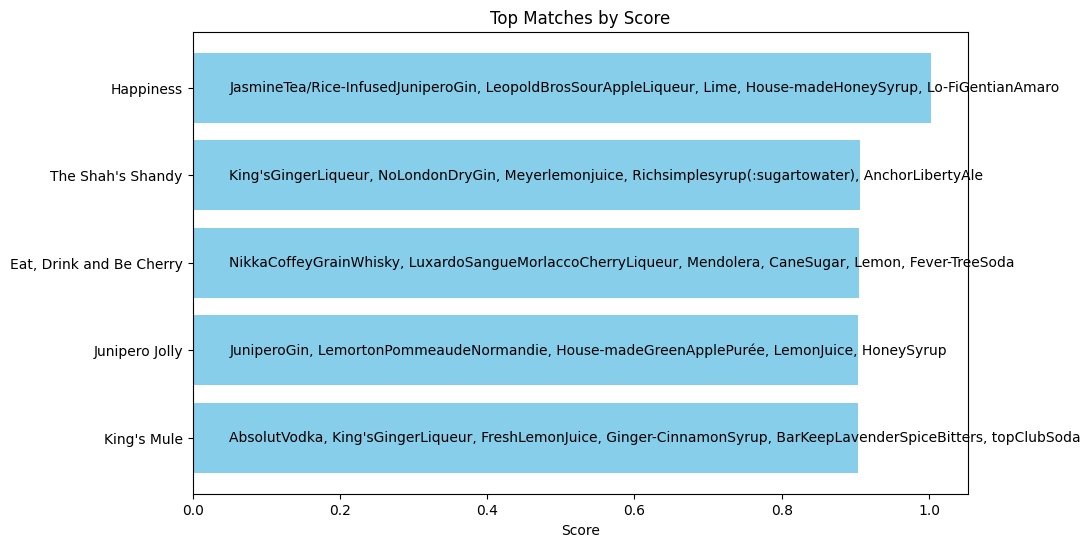

In [141]:
visualize_results(test1)

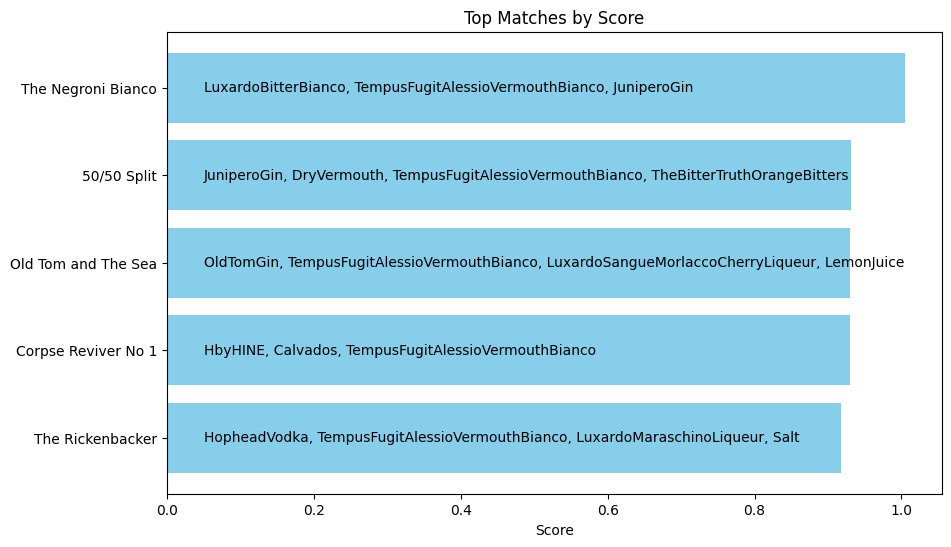

In [142]:
visualize_results(check)